## Resumen 

Este trabajo estudia la relación que tiene el nivel de escolaridad sobre el nivel de salarios de la 
población económicamente activa (PEA) en condición ocupada de Yopal Casanare. Los datos 
utilizados para el análisis se obtuvieron a través de encuestas dirigidas a la población trabajadora 
de la zona urbana entre noviembre y diciembre del año 2021. La metodología econométrica 
incluye la estimación por Mínimos cuadrados ordinarios (MCO) calculada con errores estándares 
robustos, donde se propone que el nivel educativo incide sobre los salarios de los trabajadores. 
Se logra determinar que, el nivel educativo es estadísticamente significativo en los salarios de la 
PEA, en donde, la edad y la experiencia influyen, pero, en menor medida sobre el nivel de 
ingreso, adicionalmente a esto, existe discriminación salarial por género. 
Palabras claves 
Grado de escolaridad, nivel de salarios, población económicamente activa (PEA), 
econometría.

Resumen de variables 

<div style="text-align: center;">
    <img src="imagenes/resmen_variables.jpg" alt="Comportamiento de las betas" style="width: 50%; height: auto;">
</div>


Principalmente se tuvieron en cuenta quince variables en la encuesta de las cuales sietefueron elegidas para el estudio dado su nivel de significancia. Cabe mencionar que las preguntas de la encuesta eran de tipo cerrada y otras semi-abierta tipo categóricas.

La variable escolaridad $X$ está registrada según el nivel de escolaridad culminado
satisfactoriamente, por lo que, no se tuvo en cuenta algún proceso de adelanto de dicha formación, si no, hasta haberlo completado. La variable canal de búsqueda $Q$ se plantea como variable dicótoma, si la persona fue recomendada para su trabajo o no contaba con alguna recomendación. En la variable escolaridad fuera del departamento $F$ se preguntó si alguno de los títulos académicos fue completado fuera del departamento, en este caso Casanare, dado que podría tener alguna incidencia el hecho de haber llevado a cabo estudios fuera de este, puesto que existe mejor reconocimiento y más alto nivel en cuanto a la oferta educacional en otros departamentos.

In [1]:
library(readxl)
data <- read_excel("datos modelos.xlsx")
head(data, 5)


Obs,y,y2,yln,yd,q,x1,x2,x3,f,g,w,w_2,wed,son,son_2,z,z_2,zln
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1500000,2.25e+12,14.22098,1500,0,0,0,1,0,1,26,676,0,0,0,2,4,0.6931472
2,2300000,5.29e+12,14.64842,2300,1,0,0,1,0,1,25,625,1,1,1,8,64,2.0794415
3,300000,9.00e+10,12.61154,300,1,0,0,1,0,0,44,1936,1,2,1,10,100,2.3025851
4,2900000,8.41e+12,14.88022,2900,1,0,0,1,0,1,54,2916,1,1,1,28,784,3.3322045
5,2300000,5.29e+12,14.64842,2300,1,1,0,0,0,0,63,3969,1,2,1,20,400,2.9957323


In [2]:
attach(data) # Attach para mejor manejo de variables

## Determinación del tamaño muestral 

Los datos fueron obtenidos a través de encuestas mediante el método de muestreo aleatorio simple. El tamaño de muestra fue estimado mediante análisis gráfico del comportamiento asintótico de los parámetros del modelo. La distribución asintótica se emplea para aproximar a la verdadera distribución muestral de una variable aleatoria, proponiendo que la distribución de un estimador consistente tiende a acercarse más en probabilidad al valor verdadero, conforme aumenta el tamaño de la muestra. A continuación, se muestran gráficamente el comportamiento de las betas estimadas según lo anteriormente expuesto, esta parte hace parte del preprosesameinto realizado en el sofware excel para hacer más eficiente el analisis. 

![](determiacion muestra.jpg)

Se puede apreciar, que en la mayoría de las betas $β$ estimadas sus coeficientes se estabilizan alrededor de los 380 datos, conduciendo hacia el valor real. 

In [23]:
##  llamar librerías 
library(MASS)
library(tidyverse)
library(ggpubr)
library(ggplot2)
library(car)
library(lmtest)
library(sandwich)


Estimación de coeficientes del modelo  
Para hallar los coeficientes del modelo se utilizó la función $StepAIC$ del paquete $𝑀𝐴𝑆𝑆$, del software estadístico R, por el cual, a través de algoritmos selecciona variables mediante el método hacia adelante y hacia atrás, utilizando la herramienta Akaik Information Criterion. 

AIC se define como:  

$AIC= -2* LogLink+K*  n_(parametros )$

Donde 𝐿𝑜𝑔𝐿𝑖𝑛𝑘 corresponde al valor de log de verosimilitud para el vector de los parámetros 
estimados, $𝑘$ es el valor de penalización dado por el número de parámetros incluidos en el 
modelo y $𝑛_(𝑝𝑎𝑟𝑎𝑚𝑒𝑡𝑟𝑜𝑠)$ corresponde al número de parámetros comprendidos por el modelo, 
mayormente conocido como “Schwarz’s Bayesian criterion”. (Freddy Hernández, 2020) 


## Selección de variables

In [4]:
model= lm(yln~q+x1+x2+x3+f+g+w+w_2+wed+son+son_2+z+z_2+zln)
summary(model) 
seleccion_1=stepAIC(model,direction = c("both"))
summary(seleccion_1)


Call:
lm(formula = yln ~ q + x1 + x2 + x3 + f + g + w + w_2 + wed + 
    son + son_2 + z + z_2 + zln)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.11982 -0.24849  0.01962  0.24739  1.11390 

Coefficients: (1 not defined because of singularities)
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.9396801  0.2511351  55.507  < 2e-16 ***
q           -0.1203389  0.0499344  -2.410 0.016433 *  
x1          -0.4876933  0.0616568  -7.910 2.89e-14 ***
x2          -0.3635238  0.0563911  -6.446 3.51e-10 ***
x3                  NA         NA      NA       NA    
f            0.2449239  0.0477711   5.127 4.72e-07 ***
g            0.1617738  0.0471791   3.429 0.000673 ***
w            0.0156728  0.0139003   1.128 0.260241    
w_2         -0.0001256  0.0001692  -0.742 0.458415    
wed          0.0674705  0.0522956   1.290 0.197781    
son          0.0103245  0.0306804   0.337 0.736669    
son_2        0.0289828  0.0723920   0.400 0.689119    
z            0.0173593

Start:  AIC=-635.84
yln ~ q + x1 + x2 + x3 + f + g + w + w_2 + wed + son + son_2 + 
    z + z_2 + zln


Step:  AIC=-635.84
yln ~ q + x1 + x2 + f + g + w + w_2 + wed + son + son_2 + z + 
    z_2 + zln

        Df Sum of Sq    RSS     AIC
- zln    1    0.0015 71.587 -637.83
- son    1    0.0215 71.607 -637.73
- son_2  1    0.0304 71.616 -637.68
- w_2    1    0.1046 71.691 -637.27
- z_2    1    0.1559 71.742 -636.99
- w      1    0.2414 71.827 -636.53
- z      1    0.3120 71.898 -636.14
- wed    1    0.3161 71.902 -636.12
<none>               71.586 -635.84
- q      1    1.1028 72.689 -631.87
- g      1    2.2326 73.819 -625.84
- f      1    4.9914 76.577 -611.49
- x2     1    7.8910 79.477 -596.96
- x1     1   11.8800 83.466 -577.81

Step:  AIC=-637.83
yln ~ q + x1 + x2 + f + g + w + w_2 + wed + son + son_2 + z + 
    z_2

        Df Sum of Sq    RSS     AIC
- son    1    0.0223 71.610 -639.71
- son_2  1    0.0304 71.618 -639.67
- w_2    1    0.1059 71.693 -639.26
- w      1    0.2428 71


Call:
lm(formula = yln ~ q + x1 + x2 + f + g + w + wed + z + z_2)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.13814 -0.24866  0.00905  0.24986  1.12252 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 14.0867748  0.1013697 138.964  < 2e-16 ***
q           -0.1281943  0.0493594  -2.597 0.009764 ** 
x1          -0.4946206  0.0591580  -8.361 1.18e-15 ***
x2          -0.3631718  0.0551258  -6.588 1.48e-10 ***
f            0.2472526  0.0470948   5.250 2.53e-07 ***
g            0.1591214  0.0463866   3.430 0.000669 ***
w            0.0070964  0.0030817   2.303 0.021829 *  
wed          0.0876550  0.0494022   1.774 0.076810 .  
z            0.0206949  0.0081814   2.530 0.011825 *  
z_2         -0.0003760  0.0002161  -1.741 0.082571 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4344 on 381 degrees of freedom
Multiple R-squared:  0.4408,	Adjusted R-squared:  0.4276 
F-statistic: 33.37 on 9 a

se corre el primer modelo para ver cuales variables resultan siginicativas 

In [5]:
model_2 =lm(yln ~ q + x1 + x2 + f + g + w + wed + z + z_2)
summary(model_2)


Call:
lm(formula = yln ~ q + x1 + x2 + f + g + w + wed + z + z_2)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.13814 -0.24866  0.00905  0.24986  1.12252 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 14.0867748  0.1013697 138.964  < 2e-16 ***
q           -0.1281943  0.0493594  -2.597 0.009764 ** 
x1          -0.4946206  0.0591580  -8.361 1.18e-15 ***
x2          -0.3631718  0.0551258  -6.588 1.48e-10 ***
f            0.2472526  0.0470948   5.250 2.53e-07 ***
g            0.1591214  0.0463866   3.430 0.000669 ***
w            0.0070964  0.0030817   2.303 0.021829 *  
wed          0.0876550  0.0494022   1.774 0.076810 .  
z            0.0206949  0.0081814   2.530 0.011825 *  
z_2         -0.0003760  0.0002161  -1.741 0.082571 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4344 on 381 degrees of freedom
Multiple R-squared:  0.4408,	Adjusted R-squared:  0.4276 
F-statistic: 33.37 on 9 a

# Modelo más eficiente

In [6]:
model_2 =lm(yln ~ q + x1 + x2 + f + g + w + wed + z + z_2)
summary(model_2)


Call:
lm(formula = yln ~ q + x1 + x2 + f + g + w + wed + z + z_2)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.13814 -0.24866  0.00905  0.24986  1.12252 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 14.0867748  0.1013697 138.964  < 2e-16 ***
q           -0.1281943  0.0493594  -2.597 0.009764 ** 
x1          -0.4946206  0.0591580  -8.361 1.18e-15 ***
x2          -0.3631718  0.0551258  -6.588 1.48e-10 ***
f            0.2472526  0.0470948   5.250 2.53e-07 ***
g            0.1591214  0.0463866   3.430 0.000669 ***
w            0.0070964  0.0030817   2.303 0.021829 *  
wed          0.0876550  0.0494022   1.774 0.076810 .  
z            0.0206949  0.0081814   2.530 0.011825 *  
z_2         -0.0003760  0.0002161  -1.741 0.082571 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4344 on 381 degrees of freedom
Multiple R-squared:  0.4408,	Adjusted R-squared:  0.4276 
F-statistic: 33.37 on 9 a

### Modelo excluyendo variables no significativas
A continuación se eliminan las variables que no resultan relevantes para el modelo, teniendo en cuanta su bondad de ajuste y significancia o ‘P_value’

In [7]:
model_3 =lm(yln ~ q + f + x1 + x2 + g + w + z)
summary(model_3)


Call:
lm(formula = yln ~ q + f + x1 + x2 + g + w + z)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.09696 -0.24723 -0.00353  0.23356  1.10842 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 14.106159   0.100159 140.838  < 2e-16 ***
q           -0.125725   0.049610  -2.534 0.011666 *  
f            0.249085   0.047328   5.263 2.37e-07 ***
x1          -0.517640   0.058333  -8.874  < 2e-16 ***
x2          -0.371533   0.055190  -6.732 6.14e-11 ***
g            0.155655   0.046656   3.336 0.000932 ***
w            0.009168   0.002976   3.081 0.002212 ** 
z            0.008072   0.003865   2.088 0.037419 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4371 on 383 degrees of freedom
Multiple R-squared:  0.4308,	Adjusted R-squared:  0.4204 
F-statistic: 41.41 on 7 and 383 DF,  p-value: < 2.2e-16


## Intervalos de confianza

In [8]:
confint(model_3)

,2.5 %,97.5 %
(Intercept),13.9092289432,14.30308829
q,-0.2232664986,-0.02818313
f,0.1560302711,0.34213890
x1,-0.6323323917,-0.40294663
x2,-0.4800460295,-0.26301992
g,0.0639211437,0.24738857
w,0.0033173732,0.01501815
z,0.0004725449,0.01567233


En las anteriores tablas se muestra el coeficiente logarítmico de las variables, las cuales explican el fenómeno estudiado en este trabajo, el cual intenta desvelar los factores que inciden en el ingreso de la PEA ocupada del área urbana de Yopal Casanare.  
Como se puede apreciar, todos los coeficientes presentan significancia indicando que,impactan directamente al ingreso de la población estudiada y a su vez se puede apreciar que no todos los valores de los coeficientes tienen signo positivo, por lo tanto, se puede concluir que no todas las variables incluidas en el estudio aumentan la posibilidad de elevar el nivel de ingreso. 
De igual forma se puede apreciar, tanto significancia estadística individual como conjunta, apreciando los intervalos de confianza, los cuales presentan rangos normales y de la misma forma todos los estimadores presentan coeficientes congruentes con los intervalos, siendo estos significativos, por lo cual se incluyen todas las variables en el modelo. 


# Supuetos del modelo 

A fin de evaluarla fiabilidad del modelo se contrastan los siguientes supuestos  


## Supuesto de Linealidad

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


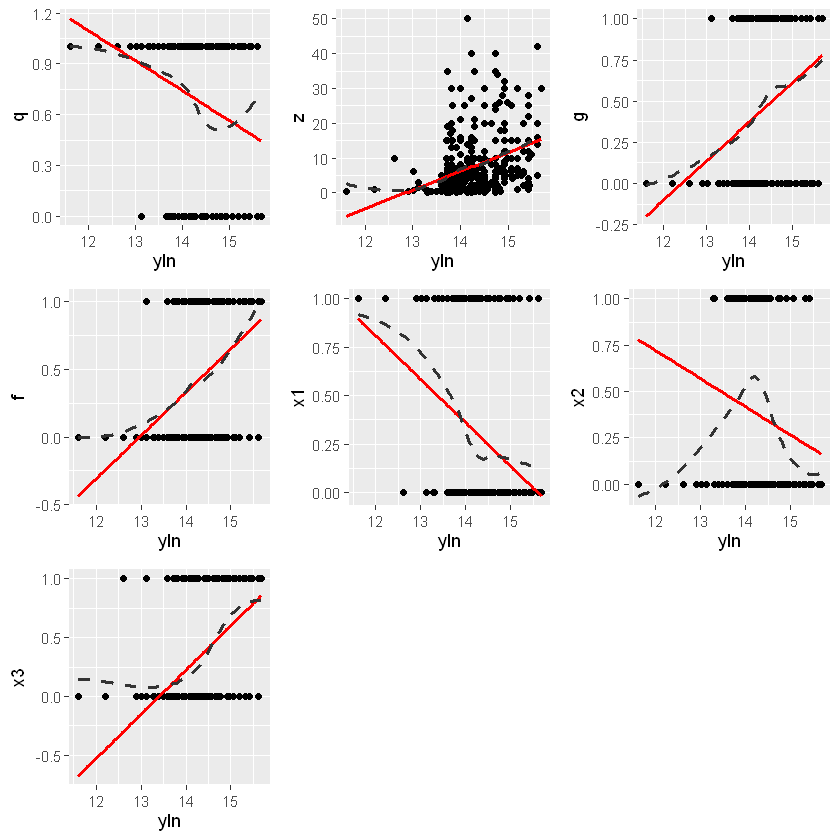

In [9]:
Grafica_x1 <- ggplot(data= data, aes(x = yln, y= x1))+ geom_point()+
  geom_smooth(method = "lm", se = FALSE, color = "red", linetype = "solid")+ 
  geom_smooth(method = "loess", se= FALSE, color= "gray20", linetype= "dashed")

Grafica_x2 <- ggplot(data= data, aes(x = yln, y= x2))+ geom_point()+
  geom_smooth(method = "lm", se = FALSE, color = "red", linetype = "solid")+ 
  geom_smooth(method = "loess", se= FALSE, color= "gray20", linetype= "dashed")

Grafica_x3 <- ggplot(data= data, aes(x = yln, y= x3))+ geom_point()+
  geom_smooth(method = "lm", se = FALSE, color = "red", linetype = "solid")+ 
  geom_smooth(method = "loess", se= FALSE, color= "gray20", linetype= "dashed")

Grafica_q <- ggplot(data= data, aes(x = yln, y= q))+ geom_point()+
  geom_smooth(method = "lm", se = FALSE, color = "red", linetype = "solid")+ 
  geom_smooth(method = "loess", se= FALSE, color= "gray20", linetype= "dashed")

Grafica_f <- ggplot(data= data, aes(x = yln, y= f))+ geom_point()+
  geom_smooth(method = "lm", se = FALSE, color = "red", linetype = "solid")+ 
  geom_smooth(method = "loess", se= FALSE, color= "gray20", linetype= "dashed")

Grafica_g <- ggplot(data= data, aes(x = yln, y= g))+ geom_point()+
  geom_smooth(method = "lm", se = FALSE, color = "red", linetype = "solid")+ 
  geom_smooth(method = "loess", se= FALSE, color= "gray20", linetype= "dashed")

########### variables numéricas ############
Grafica_z <- ggplot(data= data, aes(x = yln, y= z))+ geom_point()+
  geom_smooth(method = "lm", se = FALSE, color = "red", linetype = "solid")+ 
  geom_smooth(method = "loess", se= FALSE, color= "gray20", linetype= "dashed")

Grafica_w <- ggplot(data= data, aes(x = yln, y= w))+ geom_point()+
  geom_smooth(method = "lm", se = FALSE, color = "red", linetype = "solid")+ 
  geom_smooth(method = "loess", se= FALSE, color= "gray20", linetype= "dashed")

################### plot gráficas de normalidad ###################
ggarrange(Grafica_q, Grafica_z, Grafica_g, Grafica_f, Grafica_x1, Grafica_x2,
          Grafica_x3, ncol = 3, nrow = 3)

Al ser calculado por mínimos cuadrados ordinarios $MCO$ se asume que existe linealidad en 
los parámetros según (Damodar N & Dawn C, 2010). Se presenta la linealidad cuando la 
speranza condicional de $𝑌, 𝐸(𝑌/𝑋𝑖)$, es una función lineal en los parámetros.  
Asumiendo el supuesto anterior, mediante el diagrama de dispersión, podemos observar la 
linealidad de las variables explicativas o independientes, respecto a la dependiente “logaritmo 
del ingreso”, cumpliendo el supuesto de linealidad en su conjunto. 

## Normalidad 
Para la verificación del supuesto de normalidad se hizo uso del gráfico de Normal Q-Q Plot 
regresión respecto a los residuos del modelo estimado. 

In [10]:
# distribution of studentized residuals

resid <- studres(model_3)

### Imagen normalidad Q-Q Plot.

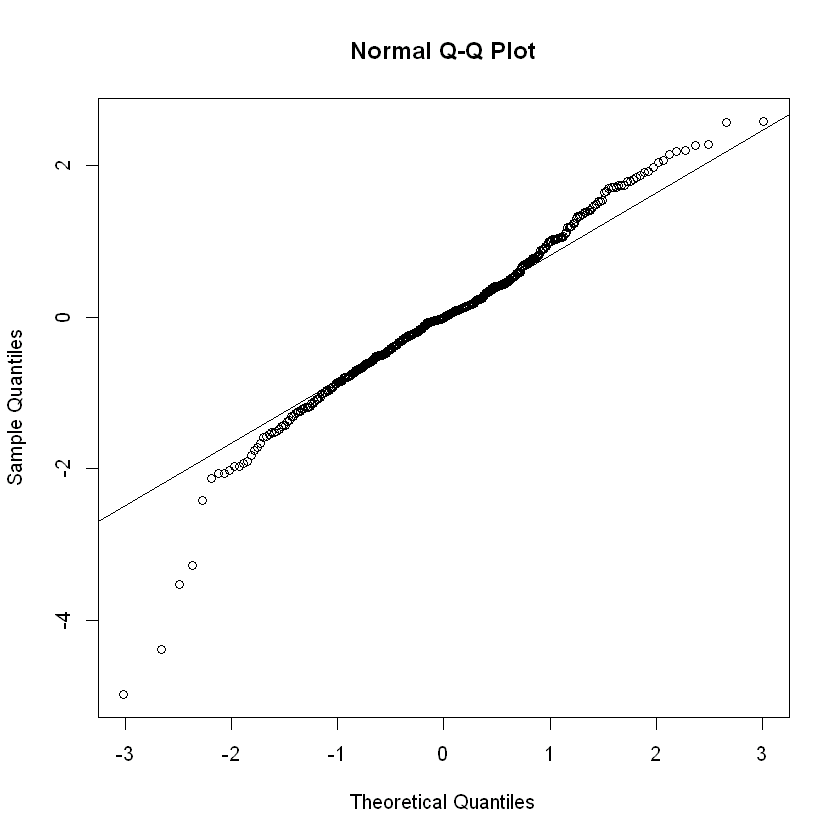

In [11]:
qqnorm(resid)
qqline(resid)

Se puede apreciar que los puntos se encuentran junto a la línea de normalidad, no obstante,algunos puntos se encuentran ligeramente alejados de la diagonal, por lo cual no se puede apreciar claramente si el supuesto de normalidad se cumple, a continuación, dispondrá evaluar el supuesto mediante la gráfica de distribución normal Gaussiana.

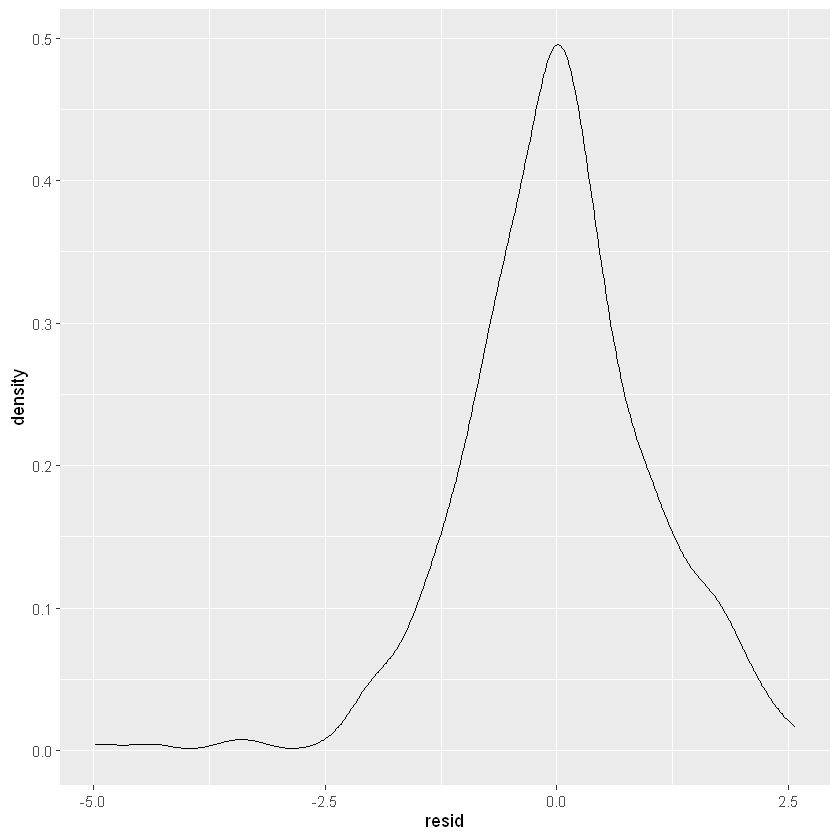

In [12]:
ggplot(data,aes(resid))+geom_density()

En el gráfico de normalidad, se puede puede observar una distribución con tendencia 
leptocúrtica, no obstante, según (Beaver et al., 2006), el teorema de límite central se puede expresar como ∑𝑥𝑖, que, cuando 𝑛 se hace grande, también tiene una distribución aproximadamente normal con media 𝑛 𝜇 y desviación estándar 𝛿√𝑛.  En este sentido, la conclusión se basa en el teorema de límite central y dar por cumplido el supuesto de normalidad en el modelo.   

## multicolinealidad

$$
\frac {R^2 (Cov_{x2_x3...xn})^2}     {Var_{x2 *VAr_x3}... Var_{xn}}
$$

In [13]:
##inflación de varianza
vif(model_3)

q        f       x1       x2        g        w        z 
1.056285 1.103952 1.481452 1.470380 1.091783 2.396480 2.360204

Como se puede apreciar en la matriz factor de inflación de la varianza, los valores están por debajo de 10, por lo cual, se puede descartar en el modelo la presencia de multicolinealidad. 

### Coeficientes de Correlación entre variables numericas

In [14]:
cor(data[,c("w","z")], use="complete")

,w,z
w,1.0000000,0.7479985
z,0.7479985,1.0000000


## Heteroscedasticidad

Para evaluar este supuesto se plantea el test “studentized Breusch-Pagan” localizado en la librería de R “lmtest” el cual consiste en estimar el modelo inicial, comprobar si el modelo presenta heterocedasticidad, posteriormente calcular los errores del modelo y los determinantes de los errores mediante la incorporación de variables independientes (Roldán et al., 2016).

De manera específica el modelo se presenta de la siguiente manera:

![](imagenes/Breush-pagam.jpg)

In [15]:
bptest(model_3)


	studentized Breusch-Pagan test

data:  model_3
BP = 14.924, df = 7, p-value = 0.03698


Los valores del test estadístico, contradicen el supuesto de homocedasticidad, dado que el P-value es menor a 0.05 rechazando la hipótesis nula $H_0$, demostrando que el modelo presenta problemas de Heteroscedasticidad, por lo que la varianza de los errores aleatorios no es constante. Para cumplir este supuesto se corregirá el modelo mediante errores robustos estandarizados.

## Estimación del Modelo Mediante Errores Estándares Robustos

In [16]:
coeftest(model_3, vcov = vcovHC(model_3, type = "HC0"))


t test of coefficients:

              Estimate Std. Error  t value  Pr(>|t|)    
(Intercept) 14.1061586  0.0991694 142.2430 < 2.2e-16 ***
q           -0.1257248  0.0482777  -2.6042  0.009567 ** 
f            0.2490846  0.0479859   5.1908 3.405e-07 ***
x1          -0.5176395  0.0645221  -8.0227 1.276e-14 ***
x2          -0.3715330  0.0562721  -6.6024 1.352e-10 ***
g            0.1556549  0.0453176   3.4348  0.000658 ***
w            0.0091678  0.0031923   2.8718  0.004308 ** 
z            0.0080724  0.0041486   1.9458  0.052406 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


Como se puede apreciar en la tabla anterior, una vez corregido el modelo mediante el método de errores estándar robustos, se explica que ahora la experiencia ya no es significativa al $95%$ dado que su $P-Value$ es mayor a $0.05$, no obstante, sigue siendo significativa al $90$ y se toma por ser congruente con la teoría. Una vez corregido el supuesto de homocedasticidad, se evalúan las variables omitidas.


In [17]:
resettest(model_3)


	RESET test

data:  model_3
RESET = 0.24699, df1 = 2, df2 = 381, p-value = 0.7813


Para la validación del modelo de regresión lineal múltiple se utilizó el test de Ramsey, el cual propone el siguiente supuesto:
Formula que las variables independientes no están correlacionadas con el término del error.

$cov(x,ε)=(x ε )=0$ 

Donde:

$H_o$ El modelo no presenta problemas de variables omitidas  
$H_a$ = El modelo presenta problemas de variables omitidas   


Dado su $P-value$ no se rechaza la hipótesis nula, cumpliendo el supuesto de variables omitidas, por lo tanto, se puede afirmar estadísticamente que los estimadores de los parámetros  $\hat{\beta_0}$  son insesgados y eficientes. Demostrando que no existen omisiones de variables importantes o problemas de simultaneidad.


# Interpretación de resultados 	

Se seleciona el modelo 3, el cual fue estimado Mediante Errores Estándares Robustos

el cual presenta la seguinete ecuación:

### Modelo econométrico

$$ Ln(Y)= \hat{\beta_0}+ \hat{\beta}_1Q+ \hat{\beta}_2F+ \hat{\beta}_3X_1+ \hat{\beta}_4X_2+ \hat{\beta}_5G+ \hat{\beta_6}W+ \hat{\beta_7}Z + \epsilon_t $$


### Modelo muestral

$$\hat{YLn}= \hat{\beta_0}+ \hat{\beta}_1Q+ \hat{\beta}_2F+ \hat{\beta}_3X_1+ \hat{\beta}_4X_2+ \hat{\beta}_5G_1+ \hat{\beta_6}W+ \hat{\beta_7}Z $$

In [18]:
coeftest(model_3, vcov = vcovHC(model_3, type = "HC0"))


t test of coefficients:

              Estimate Std. Error  t value  Pr(>|t|)    
(Intercept) 14.1061586  0.0991694 142.2430 < 2.2e-16 ***
q           -0.1257248  0.0482777  -2.6042  0.009567 ** 
f            0.2490846  0.0479859   5.1908 3.405e-07 ***
x1          -0.5176395  0.0645221  -8.0227 1.276e-14 ***
x2          -0.3715330  0.0562721  -6.6024 1.352e-10 ***
g            0.1556549  0.0453176   3.4348  0.000658 ***
w            0.0091678  0.0031923   2.8718  0.004308 ** 
z            0.0080724  0.0041486   1.9458  0.052406 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


La ecuación resultante del modelo calculando con errores robustos presenta los siguientes estimados:

$$\hat{YLn}= 14.106158-0.125724*Q+ 0.2490846*F -0.5176395*X_1 -0.3715330*X_2-  0.1556549*G+0.0091678*W+0.0080724*Z$$
Interpretación de resultados 

La anterior ecuación econométrica se plantea para determinar las interacciones entre las variables mencionadas en el estudio relacionadas con el ingreso de la PEA. Se aborda utilizando tres variables de tipo dummy, una variable categórica y dos variables continuas. Los resultados fueron los siguientes: 

●	La variable nivel de escolaridad influyó positivamente en los salarios de la PEA ocupada de Yopal Casanare con un nivel estadístico del $95%$ de confianza para el año 2021, considerando que, respecto a u sujeto con educación profesional, un técnico o tecnóloga gana un $37%$ menos y a su vez un individuo sin educación profesional o técnica percibe un 51% menos que un profesional.

●	Se encontró que en promedio el género masculino percibe un 15% más de ingresos respecto al femenino.

●	Contrariamente a lo que a priori se podría esperar, el hecho de tener recomendación a la hora de adquirir un empleo, influye en un $12,5%$ de forma negativa, esto porque, al evaluar a un candidato para un cargo de alto nivel, esta variable es tomada en cuenta en menor medida.

●	La variable escolaridad obtenida fuera del departamento, afecta positivamente al ingreso en un $24%$, esto tal vez explicado por la falta de oferta académica de educación superior, tanto en posgrados como en pregrados.

●	Se encontró que las variables experiencia y edad presentan crecimiento lineal positivo, afectando al ingreso en $0,91%$ y $0,81%$ respectivamente, por cada unidad adicional. 


## nálisis y/o Simulación de escenarios

Función de regresión múltiple:

$$\hat{YLn}= \hat{\beta_0}+ \hat{\beta}_1Q+ \hat{\beta}_2F+ \hat{\beta}_3X_1+ \hat{\beta}_4X_2+ \hat{\beta}_5G_1+ \hat{\beta_6}W+ \hat{\beta_7}Z $$
Donde:

$$\hat{YLn}= 14.106158-0.125724*Q+ 0.2490846*F -0.5176395*X_1 -0.3715330*X_2-  0.1556549*G+0.0091678*W+0.0080724*Z$$
Así mismo 

$$\hat{YLn}= 14.1061586-0.1257248*Q- 0.5176395*X_1-0.3715330*X_2+0.2490846*F+ 0.1556549*G+ 0.0091678*W+0.0080724*Z $$ 
$$\hat{YLn} = b$$

$$ e^(\hat{YLn})= e^b $$

$$\hat{Y} = c$$

Teniendo en cuenta la relación anterior, se calculará el ingreso promedio que un individuo puede obtener, dadas ciertas características:

●	El ingreso promedio para un joven de género masculino, de alrededor de 18 años, recientemente graduado de bachiller, sin experiencia laboral y con recomendación laboral:

In [19]:
m_18 =14.1061586-0.1257248*(1)-0.5176395*1+ 0.1556549*1 + 0.0091678*(17)
Ingreso_bachiller_m_18 =exp(m_18)
Ingreso_bachiller_m_18

[1] 959628.8

●	El ingreso promedio para un individuo de género femenino de alrededor de 17 años, recientemente graduada de bachiller, sin experiencia laboral y con recomendación laboral:

In [20]:
f_18 =14.1061586-0.1257248*(1)-0.5176395*1+ 0.0091678*(17)
ingreso_bachiller_f_18 = exp(f_18)
ingreso_bachiller_f_18

[1] 821302.6

●	Se halla el ingreso promedio que podría obtener un individuo que presente las condiciones mayormente favorables en la ciudad de Yopal, este de género masculino, contando con 40 años de edad, profesional y con 10 años de experiencia laboral:

In [21]:
profesional_m_40 = 14.1061586+ 0.2490846*(1)+ 0.1556549*(1)+ 0.0091678*(40)+ 0.0080724*(10)
ingreso_profesional_m_40 = exp(profesional_m_40 )
ingreso_profesional_m_40

[1] 3135609

●	Se halla el ingreso promedio que podría obtener un individuo que presente las condiciones mayormente favorables en la ciudad de Yopal, en este caso de género femenino, contando con 40 años de edad, profesional y con 10 años de experiencia:

In [22]:
profesional_f_40 = 14.1061586+ 0.2490846*(1)+ 0.0091678*(40)+ 0.0080724*(10)
ingreso_profesional_f_40 = exp(profesional_f_40)
ingreso_profesional_f_40

[1] 2683625

### Resumen de análisis y/o simulación de escenarios.

# Conclusiones 

Como resultado del presente estudio se encontró que la variable nivel de escolaridad, influyó positivamente en los salarios de la PEA ocupada de Yopal Casanare con un nivel estadístico del 95% de confianza para el año 2021, considerando que, respecto a u sujeto con educación profesional, un técnico o tecnóloga gana un 37% menos y a su vez un individuo sin educación profesional o técnica percibe un 51% menos que un profesional.

Por otra parte, se concluye que, la edad del empleado junto con los años de experiencia laboral marca resultados positivos en el nivel de ingresos, esta última cuenta con un nivel de significancia del 90% y mediante inferencias se demostró que el ingreso es afectado en un 0,81% y 0,91% por cada año de edad y experiencia obtenido por el trabajador, respectivamente.
En cuanto a la variable género, se encontró una diferenciación salarial de alrededor del 15% a favor del género masculino, evidenciándose una posible desventaja para el género femenino en cuanto a la remuneración se refiere, es decir, por un millón de pesos que un individuo de género masculino recibe, una mujer recibiría $850.000 aproximadamente.

Adicionalmente se logró determinar que el canal de búsqueda o recomendación presenta un impacto negativo del 12,5% sobre el salario de la PEA ocupada en Yopal, esto con un nivel de significancia estadística del 95%, lo que explica que, por un millón de pesos que reciba cualquier individuo sin recomendación, un individuo diferente con recomendación y las mismas características - ceteris paribus - obtendrá $875.000.

Finalmente, se estimó que la escolaridad obtenida por fuera del departamento, influyó un 24,9% positivamente en los salarios de la PEA, lo que significa, por un millón de pesos que gana un individuo que obtuvo todos sus estudios dentro del departamento, otro individuo con las mismas características, pero que realizó sus estudios por fuera del departamento ganaría $1´250.000.
